# A Simple Example to Demonstrate the `ConformalMethods` Package.

We demonstrate the capabilites of the ConformalMethods Package by giving an example workflow involving creating data, runnning the simulation and then comparing.

In [30]:
from ConformalMethods import ACP_data, AdaptiveCP, ACP_plots

## Creating the data.

We are able to create a variety of non stationary data with different properties.

In [31]:
# Distribution with a single shift.
single_shift = ACP_data.single_shift(datapoints=2, inital_dist=(0,1), shifted_dist=(2,1),seq_length=750) # There are many arguments to change the distribution, see the function definition for more details.

# Distribution with random amount of random shifts (Within reason).
random_shift = ACP_data.random_multi_shift(datapoints=2, seq_range=(2000,2001))

## Running the Simulations

We now set our target alpha, which is one minus the coverage level we require, by intitalising the AdaptiveCP class

In [32]:
# Initialize the ACP object with the desired significance level.
ACP = AdaptiveCP(0.3)

We can now easily deploy both ACI and DtACI which are techniques from the litreature. Only ACI is shown below.

In [33]:
# Running ACI on the data.
ACI_single_shift_results = [ACP.ACI(data) for data in single_shift]
ACI_random_shift_results = [ACP.ACI(data, startpoint=451) for data in random_shift] # Added startpoint argument to allow for comparison.

Aswell as deploying my own techniques, AwACI shown below.

In [34]:
# Running AwACI on the data.
AwACI_single_shift_results = [ACP.AwACI(data) for data in single_shift]
AwACI_random_shift_results = [ACP.AwACI(data) for data in random_shift]

## Comparing the Simulations

There are a variety of methods for comparing the different simulation results which we demonstrate below.

The most simple plot being the `plot_one` method.

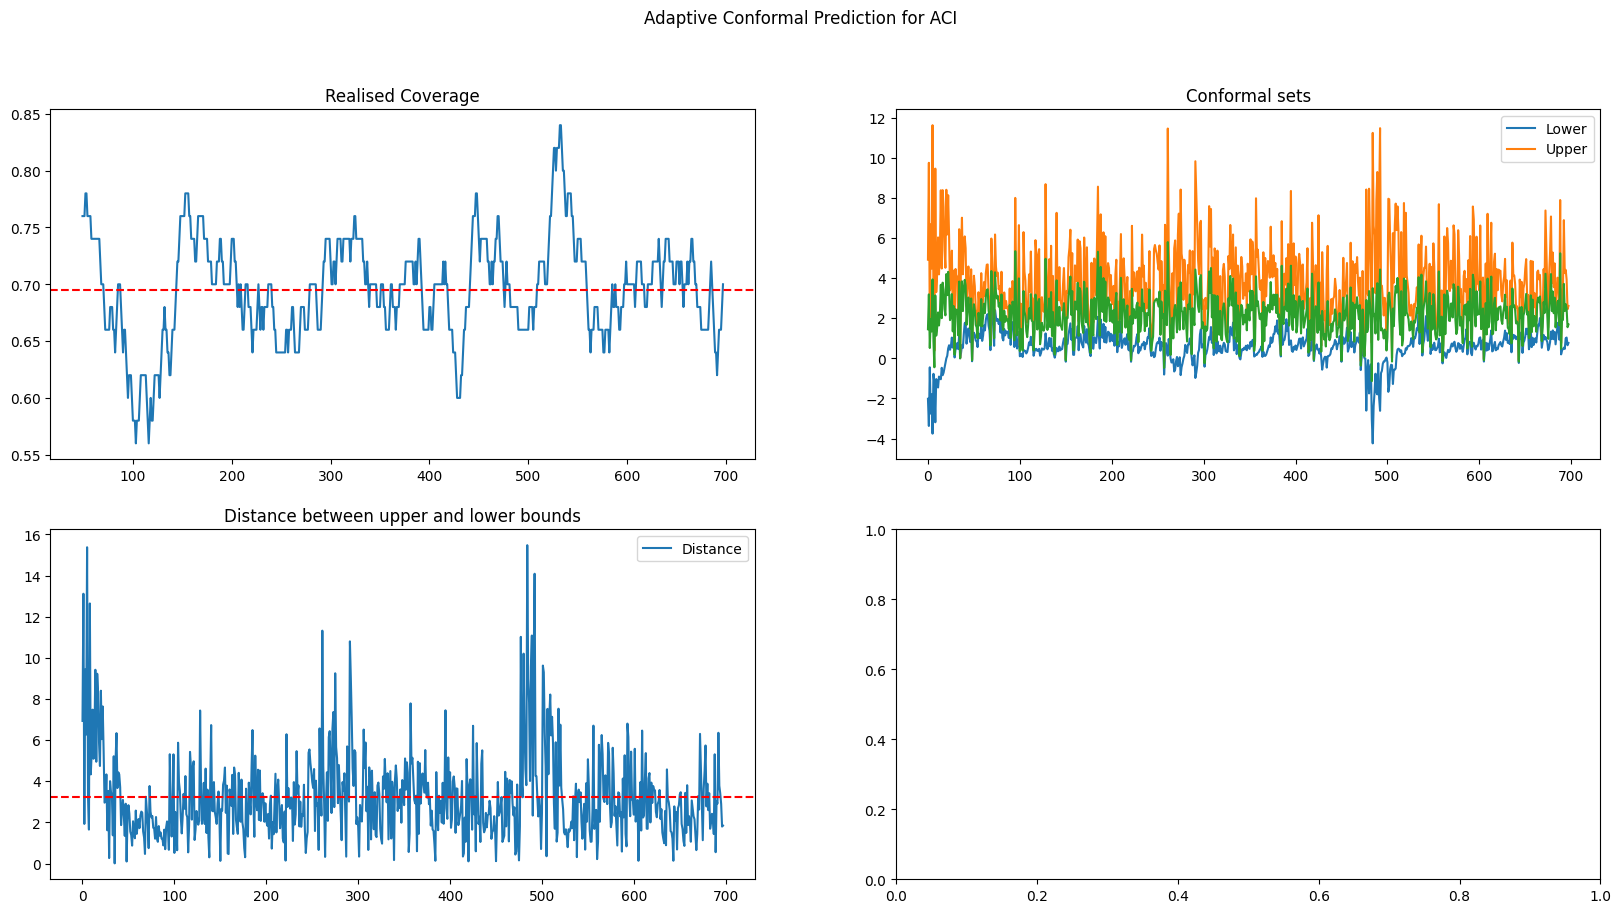

In [35]:
# Plotting the result of ACI on the single shift data.
ACP_plots.one_plot(ACI_single_shift_results[0], single_shift[0][0])

To compare plots we can use the `compare_two` method.

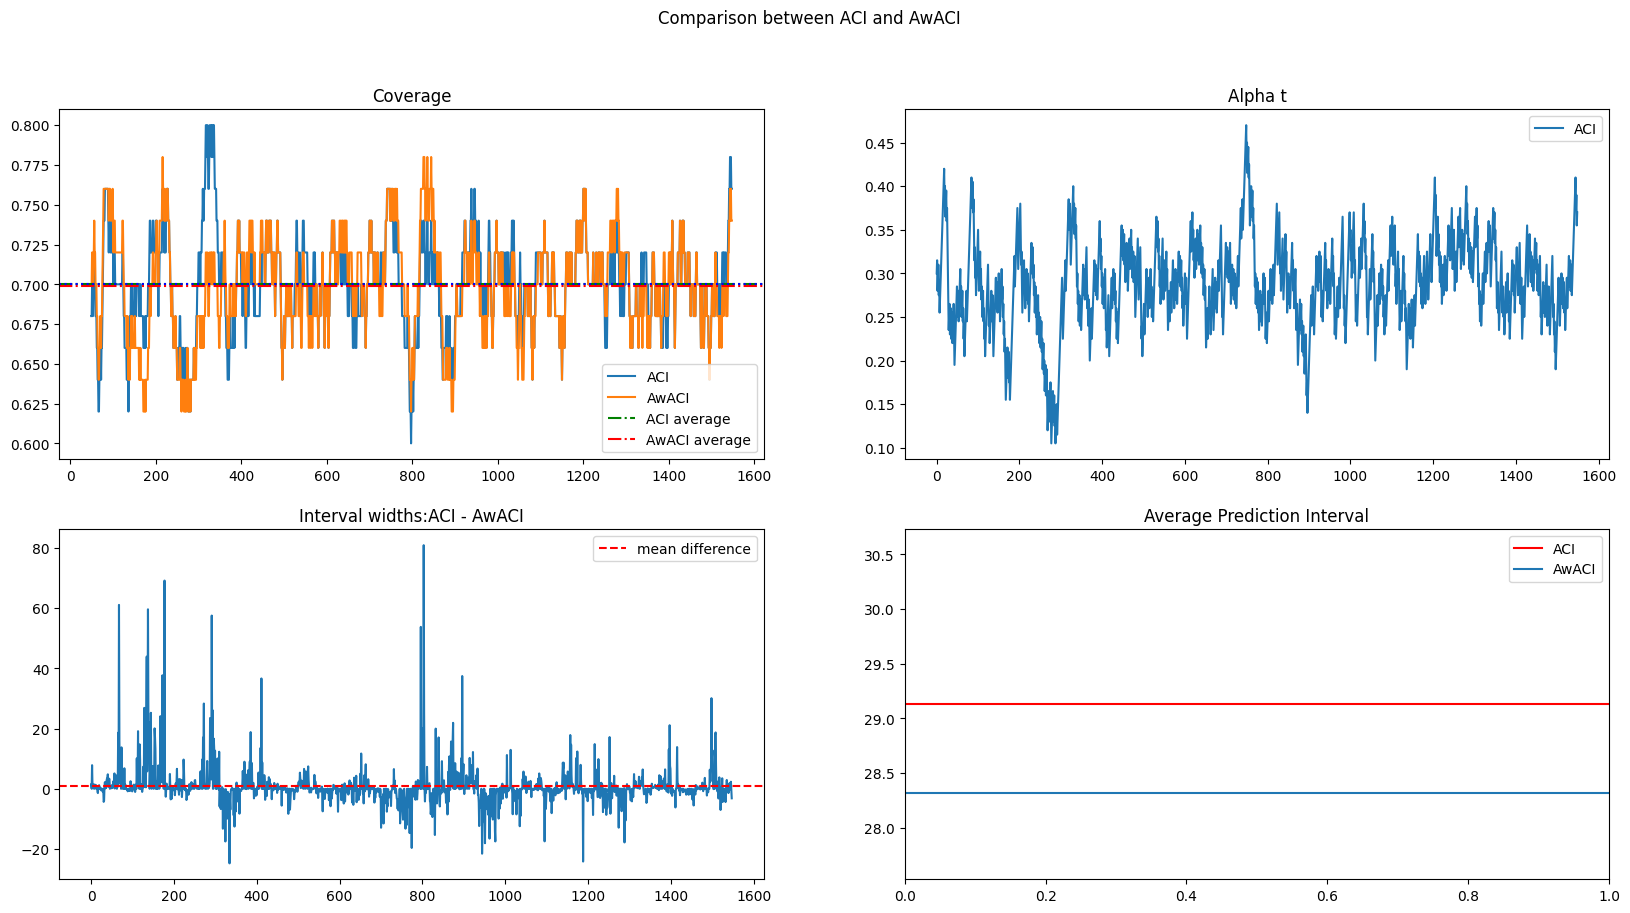

In [36]:
# Comparing the results of ACI and AwACI on the random shift data.
ACP_plots.compare_two(ACI_random_shift_results[0], AwACI_random_shift_results[0], (20,10))

We can see that my method outperforms the littreature technique as it is has a lower average prediction interval.

# Conclusion

This is a surface level introduction of the capabilites of the package, I will hopefully have documentation at one point. I invite you to read the source code in the  [document](ConformalMethods).